In [7]:
# ===== INSTALAÇÃO DAS BIBLIOTECAS =====
# Execute esta célula APENAS SE for a primeira vez usando essas bibliotecas
# Descomente a linha abaixo para instalar:
# !pip install pandas seaborn matplotlib

# Alternativa: se estiver em Colab, descomente:
# !pip install -q pandas seaborn matplotlib

In [8]:
# ===== IMPORTAÇÕES E CONFIGURAÇÃO =====

# Pandas: Manipulação e análise de dados
import pandas as pd

# Matplotlib: Biblioteca base para visualização (baixo nível)
import matplotlib.pyplot as plt

# Seaborn: Visualizações estatísticas de alto nível (construído sobre matplotlib)
import seaborn as sns

# Configurar tema global do Seaborn
# style: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
# context: 'paper', 'notebook', 'talk', 'poster' (tamanho dos elementos)
sns.set_theme(style="whitegrid", context="talk")

In [9]:
# ===== CARREGAMENTO DOS DATASETS =====
# Fonte: Zenodo (repositório de dados científicos)
# O dataset contém respostas do ENEM (Exame Nacional do Ensino Médio 2017)
# 
# Estrutura dos dados:
# - Cada linha = Um aluno
# - Colunas CH1, CH2, ..., CH45 = Respostas nas 45 questões de Ciências Humanas
# - Coluna NU_NOTA_CH = Nota final em Ciências Humanas (0-1000)
# - Similar para CN (Ciências da Natureza), LC (Linguagens), MT (Matemática)

datasets = {}

for subject in ['CH', 'CN', 'LC', 'MT']:
    url = f"https://zenodo.org/record/5784730/files/{subject}.parquet"
    datasets[subject] = pd.read_parquet(url)
    print(f"✓ {subject} carregado: {datasets[subject].shape[0]} alunos, {datasets[subject].shape[1]} colunas")

✓ CH carregado: 173543 alunos, 48 colunas
✓ CN carregado: 163153 alunos, 48 colunas
✓ LC carregado: 173696 alunos, 49 colunas
✓ MT carregado: 163161 alunos, 48 colunas


### Explorando os dados carregados

In [10]:
# Ver estrutura do dataset de Ciências Humanas
print("=" * 60)
print("DATASET: Ciências Humanas (CH)")
print("=" * 60)

df_ch = datasets['CH']

print(f"\nForma: {df_ch.shape[0]} linhas × {df_ch.shape[1]} colunas")
print(f"\nPrimeiras linhas:")
print(df_ch.head())

print(f"\nColunas disponíveis:")
print(df_ch.columns.tolist())

print(f"\nEstatísticas básicas da nota final:")
print(df_ch['NU_NOTA_CH'].describe())

DATASET: Ciências Humanas (CH)

Forma: 173543 linhas × 48 colunas

Primeiras linhas:
   NU_INSCRICAO  CH1  CH2  CH3  CH4  CH5  CH6  CH7  CH8  CH9  ...  CH38  CH39  \
0  190001592266  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  ...   0.0   0.0   
1  190001595667  1.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  ...   1.0   0.0   
2  190001595676  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...   1.0   1.0   
3  190001595684  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   1.0   1.0   
4  190001595691  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  ...   1.0   1.0   

   CH40  CH41  CH42  CH43  CH44  CH45  NU_NOTA_CH  CO_PROVA_CH  
0   1.0   0.0   0.0   1.0   1.0   0.0       548.1        509.0  
1   1.0   0.0   0.0   0.0   1.0   0.0       556.3        510.0  
2   1.0   0.0   1.0   0.0   1.0   1.0       590.4        507.0  
3   0.0   0.0   0.0   0.0   0.0   1.0       510.1        507.0  
4   0.0   1.0   0.0   0.0   0.0   0.0       535.0        509.0  

[5 rows x 48 columns]

Colunas dispon

---

## 🚀 Primeira Tarefa: Consolidar Todas as Notas

Antes de começar a visualizar, vamos consolidar os dados de todas as disciplinas em uma estrutura única.

**Objetivo**: Criar um DataFrame único (`df_notas`) que contenha as colunas e notas finais de todas as disciplinas para facilitar comparações futuras.

**O que fazer**:
1. Encontrar uma chave comum entre os quatro datasets
2. Criar um novo DataFrame com todas as colunas
3. Verificar se seu shape faz sentido, o número de linhas não pode aumentar e nem diminuir drasticamente, o número de colunas deve corresponder a soma de colunas de todos os datasets.
4. Mostrar as primeiras linhas das notas finais de cada área, por exmeplo para CH é NU_NOTA_CH

In [27]:
# ESPAÇO PARA RESOLVER A TAREFA
# Complete o código abaixo:
## df_notas = ....

# DICA:
### NU_INSCRICAO é a chave que corresponde a cada aluno, e ela também é unica, ou seja, é a coluna perfeita para um index!
### Para cada dataset df.set_index('NU_INSCRICAO') pode facilitar a sua vida; junto ao pd.concat([], axis=1) que faz o join por index dos datasets!

**SOLUÇÃO** (não olhe antes de tentar!)

```python
cols_totais = 0
row_max = []

for subject in ['CH', 'CN', 'LC', 'MT']:
    #datasets[subject] = datasets[subject].set_index('NU_INSCRICAO')
    cols_totais += datasets[subject].shape[1]
    row_max.append(datasets[subject].shape[0])

row_max = max(row_max)
    
df_notas = pd.concat(
    [
        datasets['CH'],
        datasets['CN'],
        datasets['LC'],
        datasets['MT']
    ],
    axis=1
)

print(df_notas.shape)
print(f'Linhas máximas e somatória de colunas [{row_max}, {cols_totais}]')
df_notas[['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT']]
```

# 📊 Visualização de Dados com Matplotlib e Seaborn

## Objetivo da Aula
Aprender a criar visualizações eficazes e informativas usando as principais bibliotecas de visualização em Python.

### O que vamos cobrir:
1. **Matplotlib** - Biblioteca base, controle fino das visualizações
2. **Seaborn** - Abstrações de alto nível, visualizações estatísticas elegantes
3. **Comparações práticas** entre ambas
4. **Exercícios para praticar**

---

## 📈 Dataset Utilizado
Utilizaremos dados do ENEM (Exame Nacional do Ensino Médio) com as seguintes disciplinas:
- **CH**: Ciências Humanas
- **CN**: Ciências da Natureza
- **LC**: Linguagens e Códigos
- **MT**: Matemática

Cada dataset contém as respostas dos alunos nas questões de cada disciplina.

## 🎨 Parte 1: Matplotlib - A Biblioteca Base

### O que é Matplotlib?
Matplotlib é a biblioteca **fundamental** para visualização em Python. Oferece controle fino sobre cada elemento da visualização.

### Estrutura básica:
```python
fig, ax = plt.subplots()           # Criar figura e eixos
ax.plot(x, y)                      # Adicionar dados
ax.set_xlabel('Rótulo X')          # Configurar eixos
plt.show()                         # Exibir
```

### Vamos começar com histogramas - uma das visualizações mais comuns!

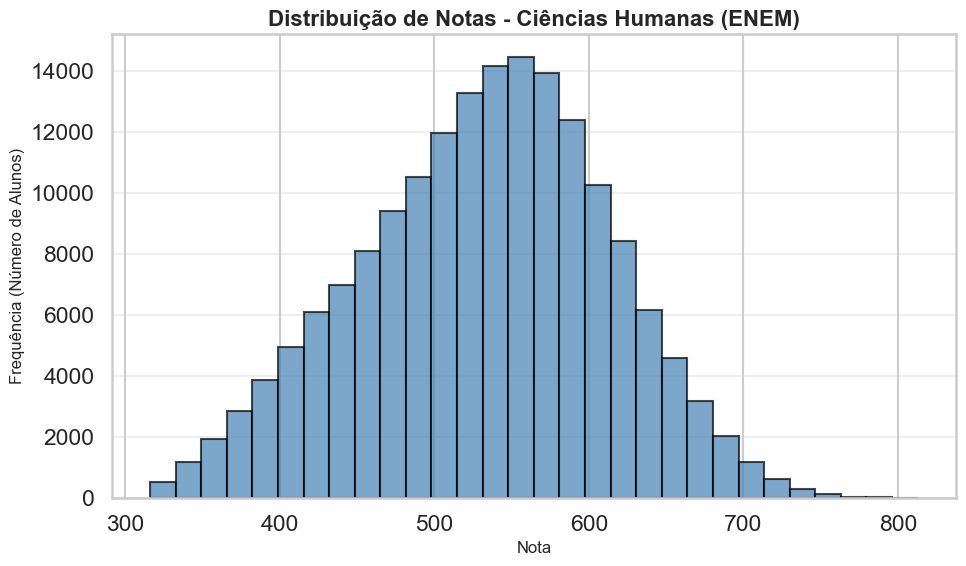

Nota média em CH: 532.26
Desvio padrão: 80.16


In [30]:
# ===== MATPLOTLIB: HISTOGRAMAS =====
# Um histograma mostra a distribuição de uma variável contínua

# Criar figura com tamanho específico (8 polegadas x 5 polegadas)
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar histograma com 30 bins (barras) e cor personalizada
ax.hist(df_notas['NU_NOTA_CH'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)

# Adicionar títulos e rótulos dos eixos
ax.set_title('Distribuição de Notas - Ciências Humanas (ENEM)', fontsize=16, fontweight='bold')
ax.set_xlabel('Nota', fontsize=12)
ax.set_ylabel('Frequência (Número de Alunos)', fontsize=12)

# Adicionar grid para facilitar leitura
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()  # Ajustar layout para não cortar elementos
plt.show()

print(f"Nota média em CH: {datasets['CH']['NU_NOTA_CH'].mean():.2f}")
print(f"Desvio padrão: {datasets['CH']['NU_NOTA_CH'].std():.2f}")

### Comparando distribuições de múltiplas disciplinas

Agora vamos criar uma visualização com **subplots** (múltiplos gráficos) para comparar todas as disciplinas lado a lado.

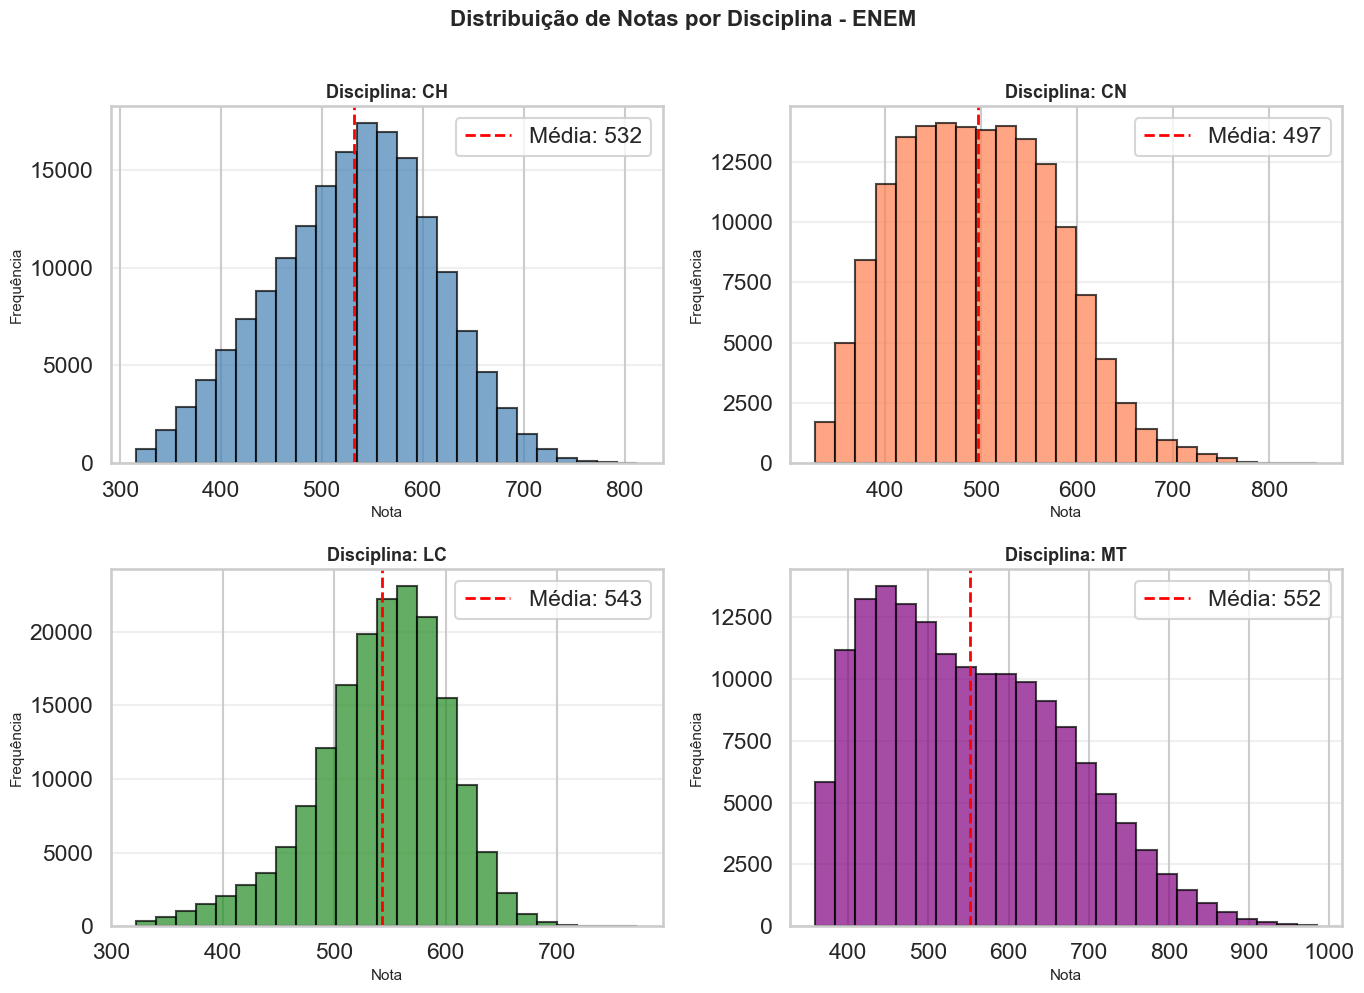

In [31]:
# ===== SUBPLOTS: Comparar 4 disciplinas =====
# Criar uma grid de 2x2 com 4 gráficos simultaneamente
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Nomes das disciplinas e suas colunas de nota
disciplinas = {
    'CH': 'NU_NOTA_CH',
    'CN': 'NU_NOTA_CN',
    'LC': 'NU_NOTA_LC',
    'MT': 'NU_NOTA_MT'
}

# Cores diferentes para cada disciplina
cores = ['steelblue', 'coral', 'forestgreen', 'purple']

# Flatten axes para iterar facilmente (array 2D -> 1D)
axes_flat = axes.flatten()

# Preencher cada subplot
for idx, (sigla, coluna) in enumerate(disciplinas.items()):
    ax = axes_flat[idx]
    
    # Plotar histograma
    ax.hist(df_notas[coluna], bins=25, color=cores[idx], edgecolor='black', alpha=0.7)
    
    # Configurar cada subplot
    ax.set_title(f'Disciplina: {sigla}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Nota', fontsize=11)
    ax.set_ylabel('Frequência', fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    
    # Adicionar estatísticas no subplot
    media = datasets[sigla][coluna].mean()
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.0f}')
    ax.legend()

fig.suptitle('Distribuição de Notas por Disciplina - ENEM', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### Scatter Plot - Analisando correlação entre disciplinas

Um **scatter plot** é perfeito para mostrar a relação entre dois conjuntos de dados contínuos.

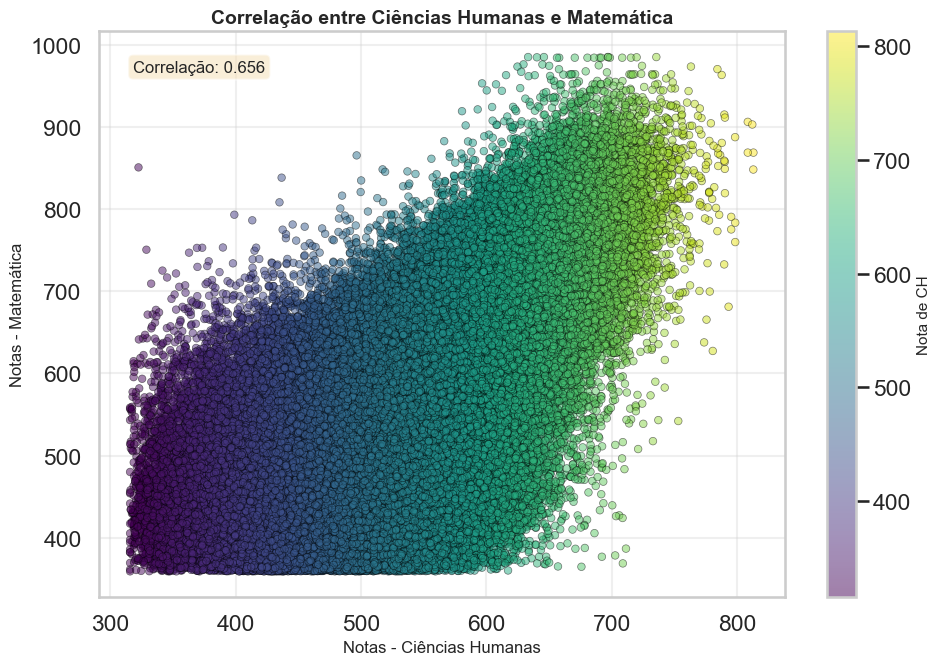

In [32]:
# ===== SCATTER PLOT: Correlação entre CH e MT =====
fig, ax = plt.subplots(figsize=(10, 7))

# Criar scatter plot
scatter = ax.scatter(df_notas['NU_NOTA_CH'], 
                     df_notas['NU_NOTA_MT'],
                     alpha=0.5,           # Transparência para ver sobreposição
                     s=30,                # Tamanho dos pontos
                     c=df_notas['NU_NOTA_CH'],  # Cor baseada em CH
                     cmap='viridis',      # Mapa de cores (gradiente)
                     edgecolors='black',  # Borda dos pontos
                     linewidth=0.5)

ax.set_xlabel('Notas - Ciências Humanas', fontsize=12)
ax.set_ylabel('Notas - Matemática', fontsize=12)
ax.set_title('Correlação entre Ciências Humanas e Matemática', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Adicionar colorbar (barra de cores)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Nota de CH', fontsize=11)

# Calcular correlação
correlacao = df_notas['NU_NOTA_CH'].corr(df_notas['NU_NOTA_MT'])
ax.text(0.05, 0.95, f'Correlação: {correlacao:.3f}', 
        transform=ax.transAxes, fontsize=12, 
        verticalalignment='top', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

### Bar Plot - Comparando desempenho médio por disciplina

**Bar plots** são ideais para comparar valores entre categorias diferentes.

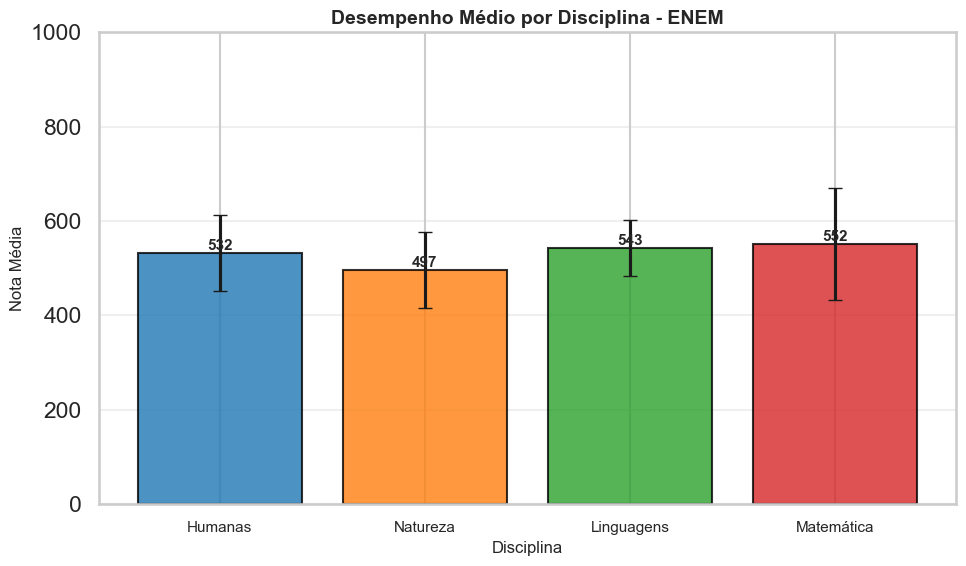

In [33]:
# ===== BAR PLOT: Desempenho médio por disciplina =====
# Calcular médias para cada disciplina
medias = {
    'Humanas': datasets['CH']['NU_NOTA_CH'].mean(),
    'Natureza': datasets['CN']['NU_NOTA_CN'].mean(),
    'Linguagens': datasets['LC']['NU_NOTA_LC'].mean(),
    'Matemática': datasets['MT']['NU_NOTA_MT'].mean()
}

# Desvios padrão para adicionar barras de erro
desvios = {
    'Humanas': datasets['CH']['NU_NOTA_CH'].std(),
    'Natureza': datasets['CN']['NU_NOTA_CN'].std(),
    'Linguagens': datasets['LC']['NU_NOTA_LC'].std(),
    'Matemática': datasets['MT']['NU_NOTA_MT'].std()
}

fig, ax = plt.subplots(figsize=(10, 6))

# Posições x para as barras
posicoes = range(len(medias))
cores_bar = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Criar bar plot com barras de erro (desvio padrão)
barras = ax.bar(posicoes, medias.values(), 
                yerr=desvios.values(),    # Adicionar barras de erro
                color=cores_bar, 
                edgecolor='black',
                linewidth=1.5,
                alpha=0.8,
                capsize=5)                # Tamanho das linhas de erro

# Personalizações
ax.set_xlabel('Disciplina', fontsize=12)
ax.set_ylabel('Nota Média', fontsize=12)
ax.set_title('Desempenho Médio por Disciplina - ENEM', fontsize=14, fontweight='bold')
ax.set_xticks(posicoes)
ax.set_xticklabels(medias.keys(), fontsize=11)
ax.set_ylim(0, 1000)
ax.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, (barra, valor) in enumerate(zip(barras, medias.values())):
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2., altura,
            f'{valor:.0f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

---

## 🎯 Parte 2: Seaborn - Visualizações Estatísticas Elegantes

### O que é Seaborn?
Seaborn é uma biblioteca **construída sobre matplotlib** que oferece:
- ✅ Visualizações estatísticas prontas para usar
- ✅ Estética padrão mais atraente
- ✅ Integração com DataFrames do pandas
- ✅ Paletas de cores sofisticadas
- ✅ Simplificação de código para visualizações complexas

### Comparação com Matplotlib:
| Aspecto | Matplotlib | Seaborn |
|---------|-----------|---------|
| **Controle** | Fino, detalhado | Alto nível |
| **Estética padrão** | Simples | Elegante |
| **Dados repetidos** | Requer agregação | Automático |
| **Paletas** | Básicas | Ricas e sofisticadas |

Vamos explorar o poder do Seaborn!

### Boxplot e Violinplot - Explorando distribuições

**Boxplot**: Mostra mediana, quartis e outliers em pouco espaço
**Violinplot**: Combina densidade de distribuição com boxplot

C:\Users\josem\AppData\Local\Temp\ipykernel_11088\3672312030.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_disciplinas, x='Disciplina', y='Nota', ax=axes[0],
C:\Users\josem\AppData\Local\Temp\ipykernel_11088\3672312030.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_disciplinas, x='Disciplina', y='Nota', ax=axes[1],


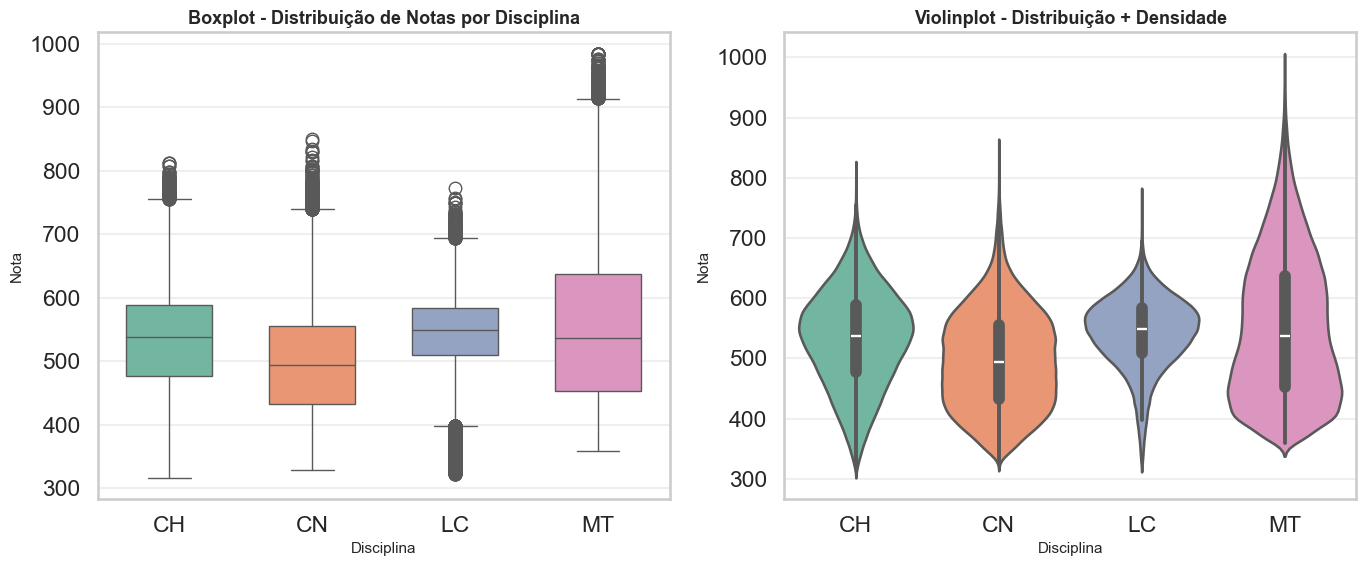

📊 INTERPRETAÇÃO DO BOXPLOT:
- Linha no meio = Mediana (50º percentil)
- Caixa = Intervalo interquartil (Q1 a Q3 = 25% a 75% dos dados)
- Linhas (whiskers) = Até 1.5 × IQR
- Pontos = Outliers (valores muito distantes)


In [35]:
# ===== SEABORN: BOXPLOT e VIOLINPLOT =====
# Preparar dados em formato "long" (melhor para Seaborn)
dados_disciplinas = []
for sigla in ['CH', 'CN', 'LC', 'MT']:
    col_nome = f'NU_NOTA_{sigla}'
    notas = df_notas[col_nome].values
    dados_disciplinas.extend([[sigla, nota] for nota in notas])

df_disciplinas = pd.DataFrame(dados_disciplinas, columns=['Disciplina', 'Nota'])

# Criar figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# BOXPLOT (esquerda)
# Mostra: mediana (linha), quartis (caixa), whiskers e outliers
sns.boxplot(data=df_disciplinas, x='Disciplina', y='Nota', ax=axes[0], 
            palette='Set2', width=0.6)
axes[0].set_title('Boxplot - Distribuição de Notas por Disciplina', 
                  fontsize=13, fontweight='bold')
axes[0].set_ylabel('Nota', fontsize=11)
axes[0].set_xlabel('Disciplina', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# VIOLINPLOT (direita)
# Combina a informação do boxplot com a densidade de distribuição
sns.violinplot(data=df_disciplinas, x='Disciplina', y='Nota', ax=axes[1],
               palette='Set2', inner='box')  # inner='box' mostra o boxplot dentro
axes[1].set_title('Violinplot - Distribuição + Densidade', 
                  fontsize=13, fontweight='bold')
axes[1].set_ylabel('Nota', fontsize=11)
axes[1].set_xlabel('Disciplina', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretar os componentes:
print("📊 INTERPRETAÇÃO DO BOXPLOT:")
print("- Linha no meio = Mediana (50º percentil)")
print("- Caixa = Intervalo interquartil (Q1 a Q3 = 25% a 75% dos dados)")
print("- Linhas (whiskers) = Até 1.5 × IQR")
print("- Pontos = Outliers (valores muito distantes)")

### Regplot - Scatter + Regressão Linear

**Regplot** combina um scatter plot com uma linha de regressão (tendência) automaticamente.

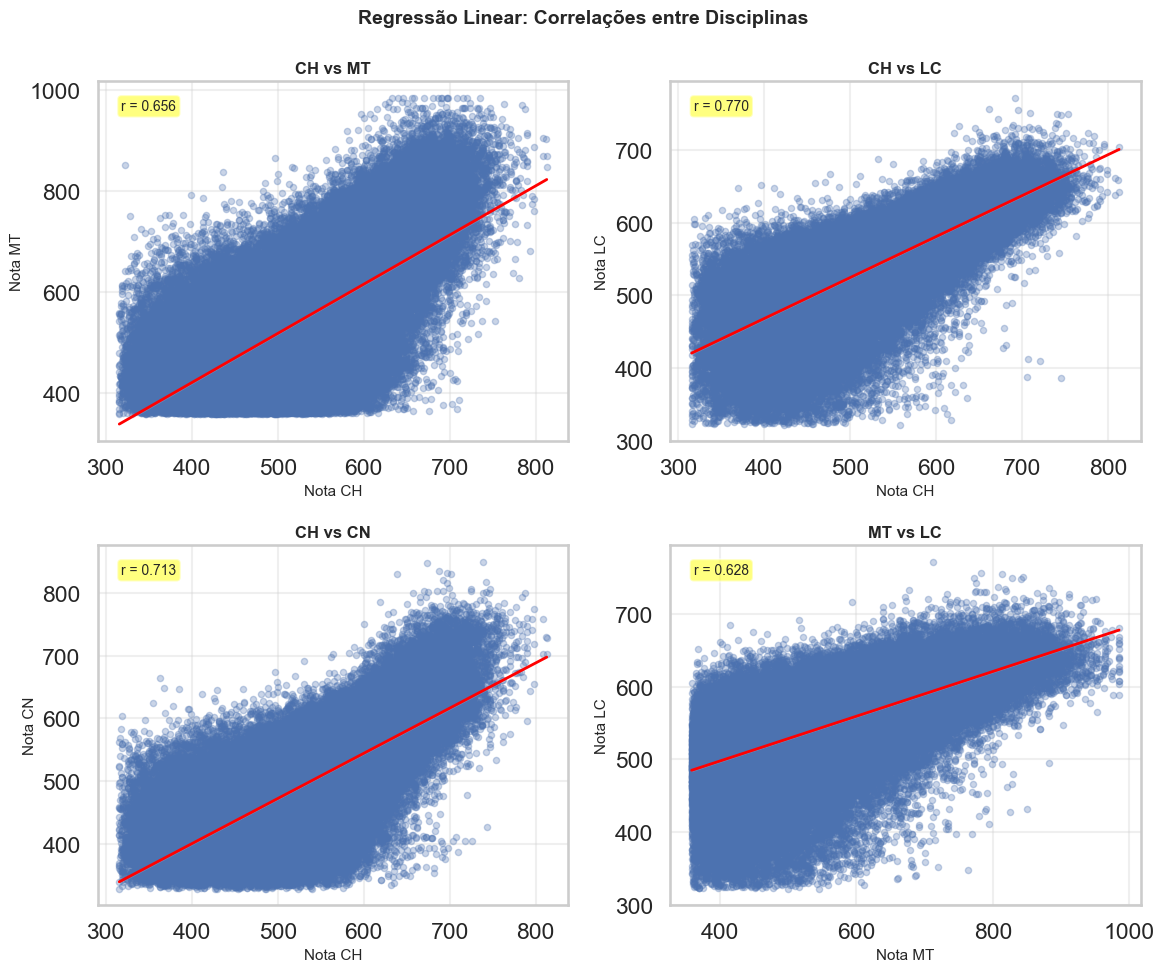

💡 Dica: A linha vermelha mostra a tendência linear dos dados.


In [38]:
# ===== SEABORN: REGPLOT - Análise de Regressão =====
# Criar um dataframe combinado para facilitar a visualização
df_corr = pd.DataFrame({
    'CH': df_notas['NU_NOTA_CH'].values,
    'MT': df_notas['NU_NOTA_MT'].values,
    'LC': df_notas['NU_NOTA_LC'].values,
    'CN':df_notas['NU_NOTA_CN'].values
})

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes_flat = axes.flatten()

comparacoes = [('CH', 'MT'), ('CH', 'LC'), ('CH', 'CN'), ('MT', 'LC')]

for idx, (var1, var2) in enumerate(comparacoes):
    # regplot automaticamente:
    # 1. Plota o scatter
    # 2. Calcula regressão linear
    # 3. Desenha a linha de tendência
    # 4. Mostra intervalo de confiança (área sombreada)
    sns.regplot(x=var1, y=var2, data=df_corr, ax=axes_flat[idx],
                scatter_kws={'alpha': 0.3, 's': 20},  # Estilo dos pontos
                line_kws={'color': 'red', 'linewidth': 2})  # Estilo da linha
    
    axes_flat[idx].set_title(f'{var1} vs {var2}', fontweight='bold', fontsize=12)
    axes_flat[idx].set_xlabel(f'Nota {var1}', fontsize=11)
    axes_flat[idx].set_ylabel(f'Nota {var2}', fontsize=11)
    axes_flat[idx].grid(True, alpha=0.3)
    
    # Adicionar correlação no gráfico
    corr = df_corr[var1].corr(df_corr[var2])
    axes_flat[idx].text(0.05, 0.95, f'r = {corr:.3f}', 
                        transform=axes_flat[idx].transAxes,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5),
                        fontsize=10)

plt.suptitle('Regressão Linear: Correlações entre Disciplinas', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("💡 Dica: A linha vermelha mostra a tendência linear dos dados.")

### Pairplot - A visão completa (matriz de correlações)

**Pairplot** é poderoso: mostra scatter plots para cada par de variáveis e histogramas na diagonal. É uma forma elegante de explorar relações multivariadas!

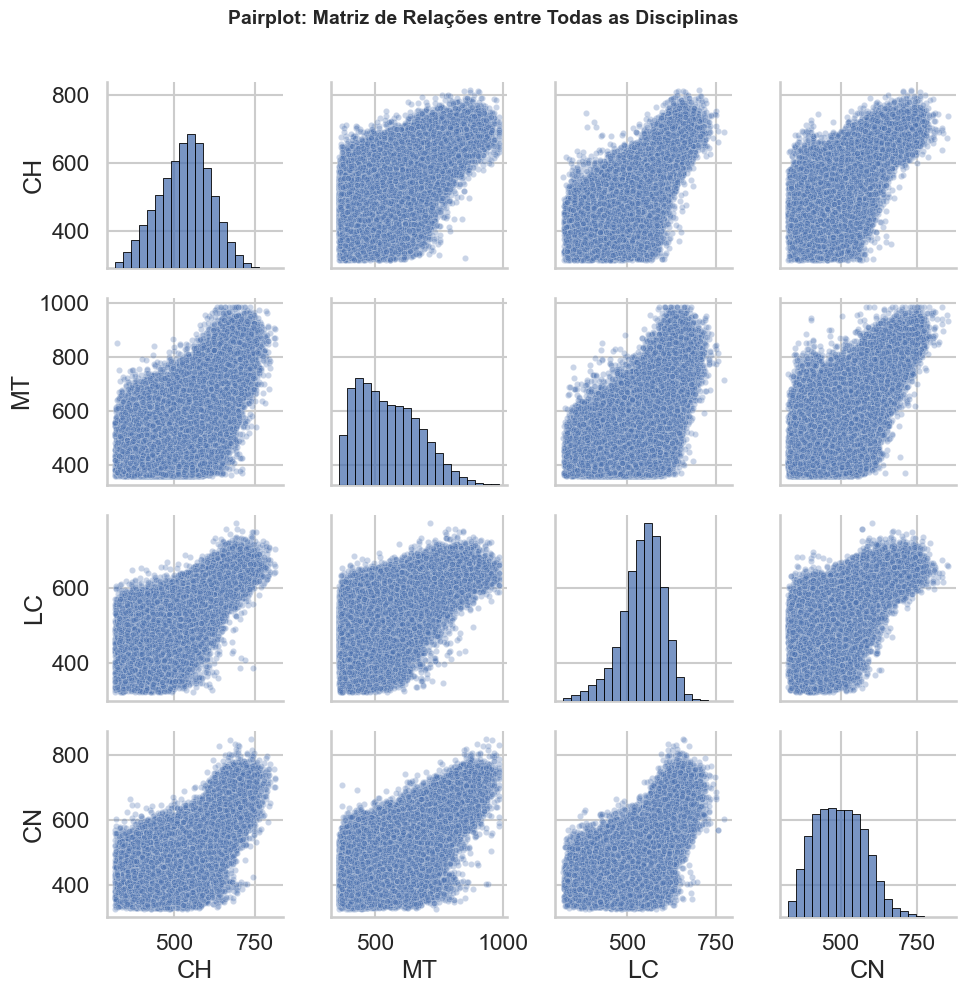

✨ Análise do Pairplot:
- Diagonal: Distribuição de cada disciplina
- Triângulo superior: Scatter plots (CH vs MT, CH vs LC, etc.)
- Triângulo inferior: Espelho dos superior
- Padrões visíveis indicam correlações entre as matérias


In [39]:
# ===== SEABORN: PAIRPLOT - Exploração multivariada =====
# Usar o dataframe que já preparamos com as 4 disciplinas
pairplot = sns.pairplot(df_corr, 
                        diag_kind='hist',      # Diagonal: histograma
                        plot_kws={'alpha': 0.3, 's': 20},  # Estilo scatter
                        diag_kws={'bins': 20, 'edgecolor': 'black'},  # Estilo histograma
                        corner=False)          # Mostrar matriz completa

# Personalizar título
pairplot.fig.suptitle('Pairplot: Matriz de Relações entre Todas as Disciplinas', 
                      fontsize=14, fontweight='bold', y=1.00)

plt.tight_layout()
plt.show()

print("✨ Análise do Pairplot:")
print("- Diagonal: Distribuição de cada disciplina")
print("- Triângulo superior: Scatter plots (CH vs MT, CH vs LC, etc.)")
print("- Triângulo inferior: Espelho dos superior")
print("- Padrões visíveis indicam correlações entre as matérias")

### Paletas de Cores e Customização

Seaborn oferece paletas de cores bonitas e contextos de estilo pré-configurados. Vamos explorar!

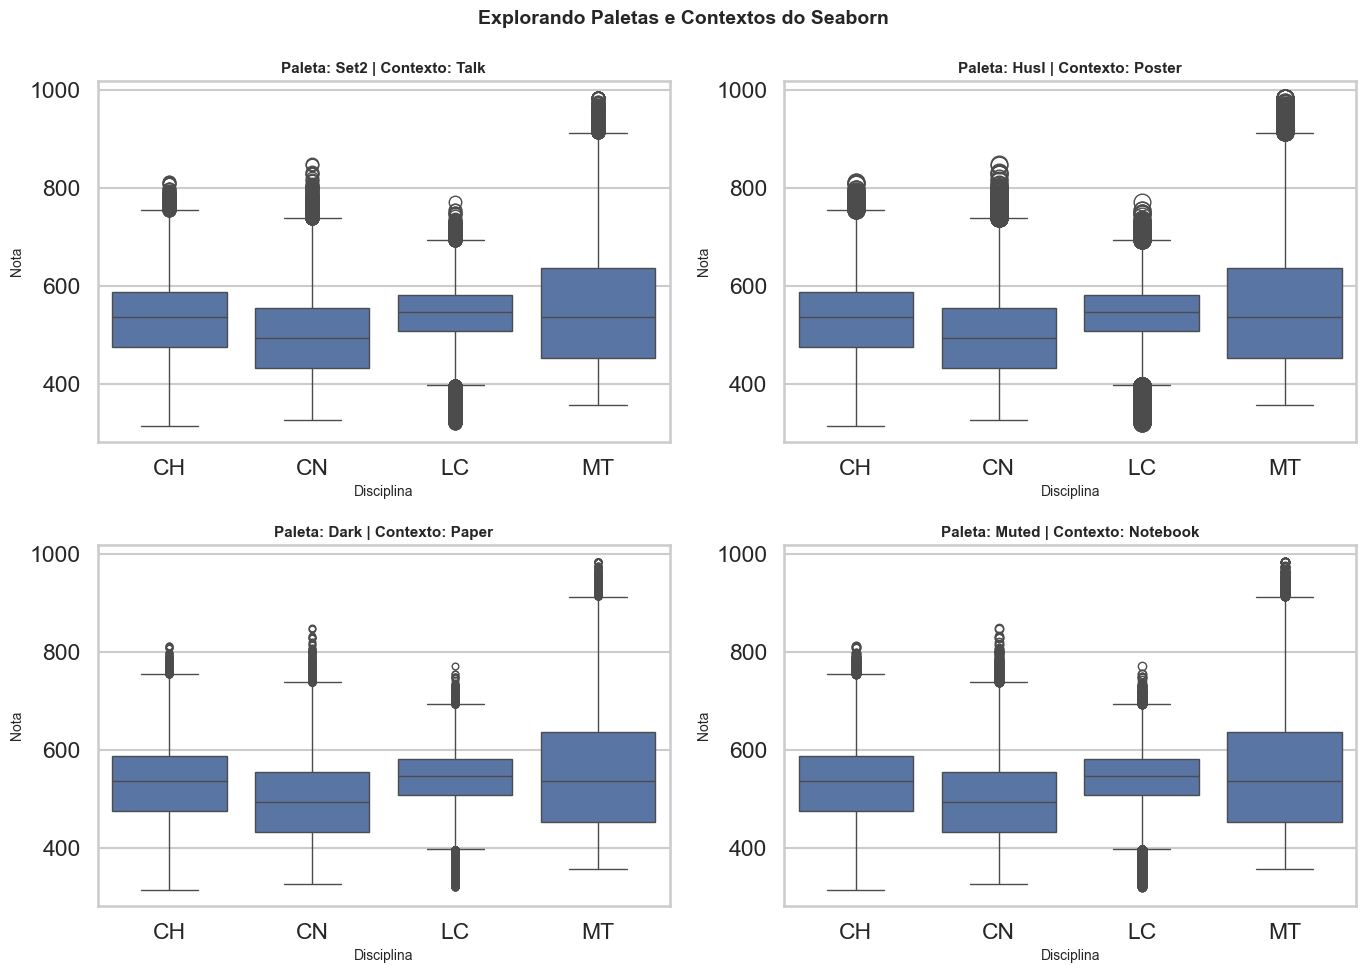

🎨 Paletas disponíveis: Set1, Set2, Set3, husl, deep, muted, pastel, dark, bright, colorblind
📐 Contextos: paper, notebook, talk, poster
💡 Dica: Use sns.set_theme(style='...', context='...') para mudar globalmente


In [40]:
# ===== CUSTOMIZAÇÃO: PALETAS E CONTEXTOS =====

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes_flat = axes.flatten()

# Diferentes combinações de paleta e contexto
configuracoes = [
    {'palette': 'Set2', 'context': 'talk', 'titulo': 'Paleta: Set2 | Contexto: Talk'},
    {'palette': 'husl', 'context': 'poster', 'titulo': 'Paleta: Husl | Contexto: Poster'},
    {'palette': 'dark', 'context': 'paper', 'titulo': 'Paleta: Dark | Contexto: Paper'},
    {'palette': 'muted', 'context': 'notebook', 'titulo': 'Paleta: Muted | Contexto: Notebook'},
]

for idx, config in enumerate(configuracoes):
    # Configurar estilo para este subplot
    sns.set_palette(config['palette'])
    sns.set_context(config['context'])
    
    # Criar boxplot com configuração específica
    sns.boxplot(data=df_disciplinas, x='Disciplina', y='Nota', ax=axes_flat[idx])
    axes_flat[idx].set_title(config['titulo'], fontweight='bold', fontsize=11)
    axes_flat[idx].set_ylabel('Nota', fontsize=10)
    axes_flat[idx].set_xlabel('Disciplina', fontsize=10)

# Restaurar configuração padrão
sns.set_theme(style="whitegrid", context="talk")

plt.suptitle('Explorando Paletas e Contextos do Seaborn', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("🎨 Paletas disponíveis: Set1, Set2, Set3, husl, deep, muted, pastel, dark, bright, colorblind")
print("📐 Contextos: paper, notebook, talk, poster")
print("💡 Dica: Use sns.set_theme(style='...', context='...') para mudar globalmente")

---

## ⚖️ Parte 3: Matplotlib vs Seaborn - Comparação Prática

Ambas bibliotecas são poderosas, mas servem propósitos ligeiramente diferentes. Vamos comparar o mesmo gráfico usando as duas abordagens!

### Exemplo: Distribuição de notas com ambas bibliotecas

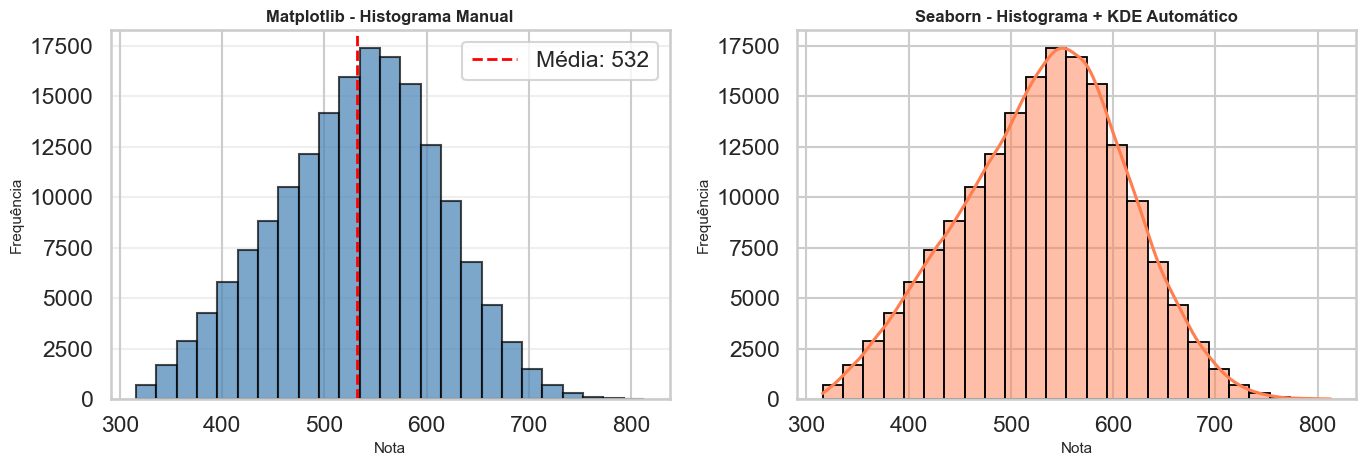

🔍 ANÁLISE COMPARATIVA:

Matplotlib:
  ✓ Máximo controle fino
  ✓ Ideal para customizações complexas
  ✗ Mais verboso (mais código)
  ✗ Estética padrão precisa de trabalho

Seaborn:
  ✓ Alto nível de abstração
  ✓ KDE, boxplots, violinplots prontos
  ✓ Estética elegante por padrão
  ✓ Menos código para tarefas comuns
  ✗ Menos controle fino em certos cenários


In [41]:
# ===== MATPLOTLIB vs SEABORN: HISTOGRAMA =====
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ===== MATPLOTLIB (esquerda) =====
# Controle fino, mas mais verboso
ax1 = axes[0]
n, bins, patches = ax1.hist(datasets['CH']['NU_NOTA_CH'], bins=25, 
                             color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_title('Matplotlib - Histograma Manual', fontsize=12, fontweight='bold')
ax1.set_xlabel('Nota', fontsize=11)
ax1.set_ylabel('Frequência', fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Customização manual
media = datasets['CH']['NU_NOTA_CH'].mean()
ax1.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.0f}')
ax1.legend()

# ===== SEABORN (direita) =====
# Abstração de alto nível, menos código, estética melhor por padrão
ax2 = axes[1]
sns.histplot(data=datasets['CH'], x='NU_NOTA_CH', bins=25, 
             kde=True,  # KDE automático!
             color='coral',
             edgecolor='black',
             ax=ax2)
ax2.set_title('Seaborn - Histograma + KDE Automático', fontsize=12, fontweight='bold')
ax2.set_xlabel('Nota', fontsize=11)
ax2.set_ylabel('Frequência', fontsize=11)

plt.tight_layout()
plt.show()

print("🔍 ANÁLISE COMPARATIVA:")
print("\nMatplotlib:")
print("  ✓ Máximo controle fino")
print("  ✓ Ideal para customizações complexas")
print("  ✗ Mais verboso (mais código)")
print("  ✗ Estética padrão precisa de trabalho")
print("\nSeaborn:")
print("  ✓ Alto nível de abstração")
print("  ✓ KDE, boxplots, violinplots prontos")
print("  ✓ Estética elegante por padrão")
print("  ✓ Menos código para tarefas comuns")
print("  ✗ Menos controle fino em certos cenários")

---

## 🎓 Parte 4: Exercícios Sugeridos

Hora de praticar! Utilize os datasets já carregados para resolver os exercícios abaixo. Pode usar matplotlib, seaborn, ou ambas!

### Exercício 1: Explorador de Distribuições
**Objetivo**: Criar um gráfico que compare a distribuição de duas disciplinas à sua escolha usando violinplot e boxplot lado a lado.

**Dicas**:
- Use `sns.violinplot()` e `sns.boxplot()`
- Considere usar subplots para colocar lado a lado
- Personalize cores com o parâmetro `palette`

### Exercício 2: Análise de Correlação Matrix
**Objetivo**: Criar um heatmap mostrando a matriz de correlação entre todas as disciplinas.

**Dicas**:
- Use `df_corr.corr()` para calcular correlações
- Use `sns.heatmap()` com `annot=True` para mostrar valores
- Experimente diferentes `cmap` (mapas de cores)

### Exercício 3: Scatter com Categorias
**Objetivo**: Criar um scatter plot de CH vs MT, mas colorindo os pontos por faixas de notas de LC (ex: baixas, médias, altas).

**Dicas**:
- Crie categorias usando `pd.cut()`
- Use `sns.scatterplot()` com parâmetro `hue` para cores por categoria
- Use `sns.lmplot()` para adicionar linha de tendência automaticamente

### Exercício 4: Dashboard Multivariado
**Objetivo**: Criar uma figura com 4 subplots mostrando diferentes perspectivas dos mesmos dados (histograma, boxplot, violinplot, KDE).

**Dicas**:
- Use `plt.subplots(2, 2)` para grid de 2x2
- Combine matplotlib e seaborn conforme necessário
- Padronize as cores entre os gráficos

### Exercício 5: Desafio - Seu Próprio Insight!
**Objetivo**: Escolha uma pergunta interessante sobre os dados e crie uma visualização para respondê-la.

**Exemplos de perguntas**:
- Qual disciplina tem maior variabilidade nas notas?
- Existe correlação entre facilidade em uma matéria e facilidade em outra?
- Qual questão é mais desafiadora em cada disciplina?
- Como a distribuição de notas se compara visualmente?

### Comece a praticar!

Use as células abaixo para resolver os exercícios. Não tenha medo de experimentar!

In [ ]:
# Espaço para resolver os exercícios:
# Use as células abaixo...

---

## 📝 GABARITO: Soluções dos Exercícios

### Solução - Exercício 1: Explorador de Distribuições

C:\Users\josem\AppData\Local\Temp\ipykernel_11088\3989330862.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_ex1, x='Disciplina', y='Nota', ax=axes[0],
C:\Users\josem\AppData\Local\Temp\ipykernel_11088\3989330862.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ex1, x='Disciplina', y='Nota', ax=axes[1],


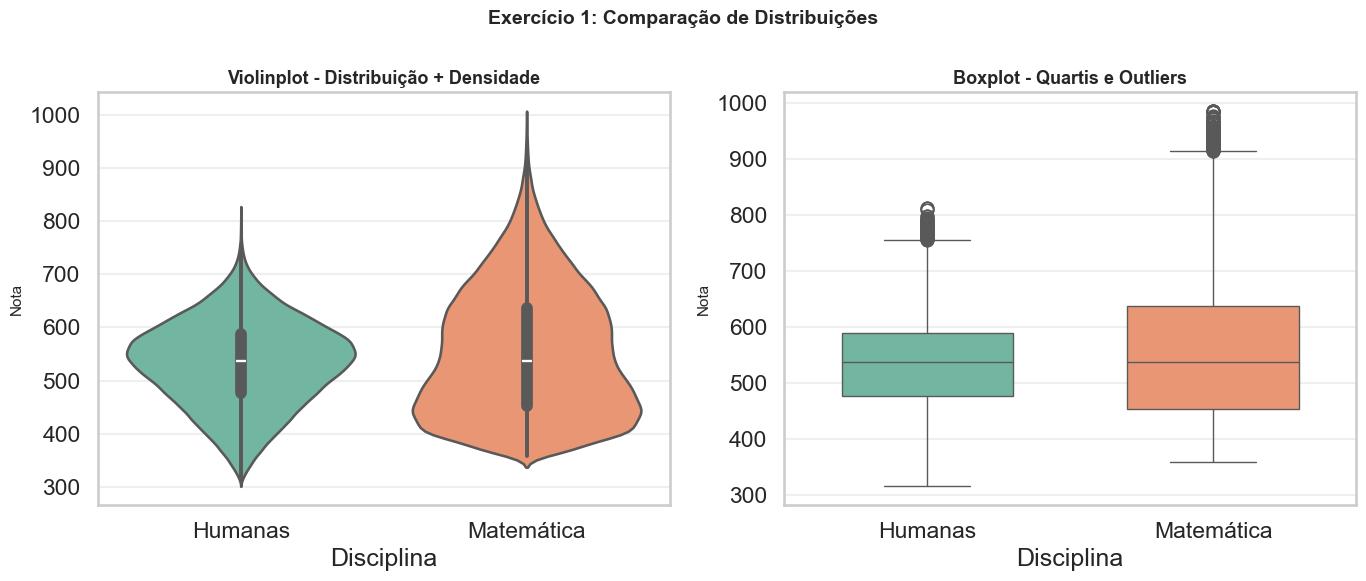

✅ Observe:
- Violinplot mostra a forma da distribuição
- Boxplot mostra a tendência central e outliers


In [42]:
# SOLUÇÃO - Exercício 1: Explorador de Distribuições
# Objetivo: Comparar violinplot e boxplot lado a lado para duas disciplinas

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Vamos comparar Humanas (CH) e Matemática (MT)
# Preparar dados em formato "long"
dados_ex1 = []
for nota in datasets['CH']['NU_NOTA_CH']:
    dados_ex1.append(['Humanas', nota])
for nota in datasets['MT']['NU_NOTA_MT']:
    dados_ex1.append(['Matemática', nota])

df_ex1 = pd.DataFrame(dados_ex1, columns=['Disciplina', 'Nota'])

# Violinplot (esquerda)
sns.violinplot(data=df_ex1, x='Disciplina', y='Nota', ax=axes[0],
               palette='Set2', inner='box')
axes[0].set_title('Violinplot - Distribuição + Densidade', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Nota', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Boxplot (direita)
sns.boxplot(data=df_ex1, x='Disciplina', y='Nota', ax=axes[1],
            palette='Set2', width=0.6)
axes[1].set_title('Boxplot - Quartis e Outliers', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Nota', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('Exercício 1: Comparação de Distribuições', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Observe:")
print("- Violinplot mostra a forma da distribuição")
print("- Boxplot mostra a tendência central e outliers")

### Solução - Exercício 2: Análise de Correlação Matrix

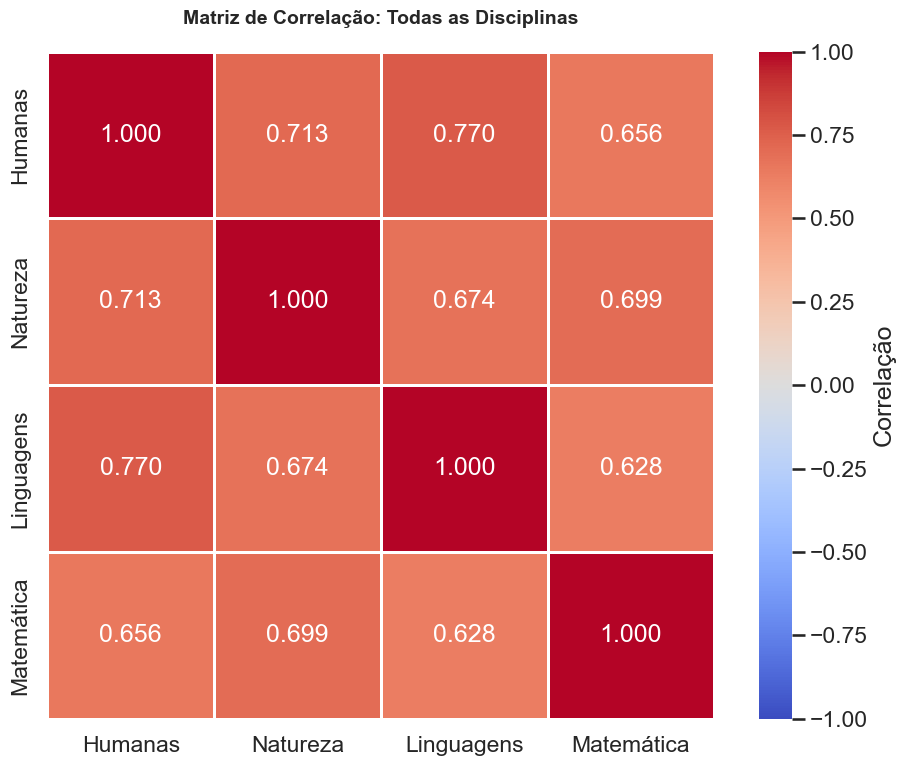

✅ Interpretação:
- Valores próximos a +1: Correlação positiva forte
- Valores próximos a -1: Correlação negativa forte
- Valores próximos a 0: Sem correlação

Correlações encontradas:
             Humanas  Natureza  Linguagens  Matemática
Humanas     1.000000  0.712765    0.769574    0.655639
Natureza    0.712765  1.000000    0.674386    0.698865
Linguagens  0.769574  0.674386    1.000000    0.628322
Matemática  0.655639  0.698865    0.628322    1.000000


In [43]:
# SOLUÇÃO - Exercício 2: Análise de Correlação Matrix
# Objetivo: Criar heatmap da correlação entre todas as disciplinas

# Se ainda não temos df_notas consolidado, criar agora
df_notas_ex2 = pd.DataFrame({
    'Humanas': datasets['CH']['NU_NOTA_CH'],
    'Natureza': datasets['CN']['NU_NOTA_CN'],
    'Linguagens': datasets['LC']['NU_NOTA_LC'],
    'Matemática': datasets['MT']['NU_NOTA_MT']
})

# Calcular matriz de correlação
matriz_corr = df_notas_ex2.corr()

# Criar heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(matriz_corr, 
            annot=True,           # Mostrar valores
            fmt='.3f',            # Formato: 3 casas decimais
            cmap='coolwarm',      # Mapa de cores
            center=0,             # Centralizar em 0
            vmin=-1, vmax=1,      # Limites de -1 a 1
            square=True,          # Células quadradas
            linewidths=2,         # Largura das linhas
            cbar_kws={'label': 'Correlação'},
            ax=ax)

ax.set_title('Matriz de Correlação: Todas as Disciplinas', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ Interpretação:")
print(f"- Valores próximos a +1: Correlação positiva forte")
print(f"- Valores próximos a -1: Correlação negativa forte")
print(f"- Valores próximos a 0: Sem correlação")
print(f"\nCorrelações encontradas:")
print(matriz_corr)

### Solução - Exercício 3: Scatter com Categorias

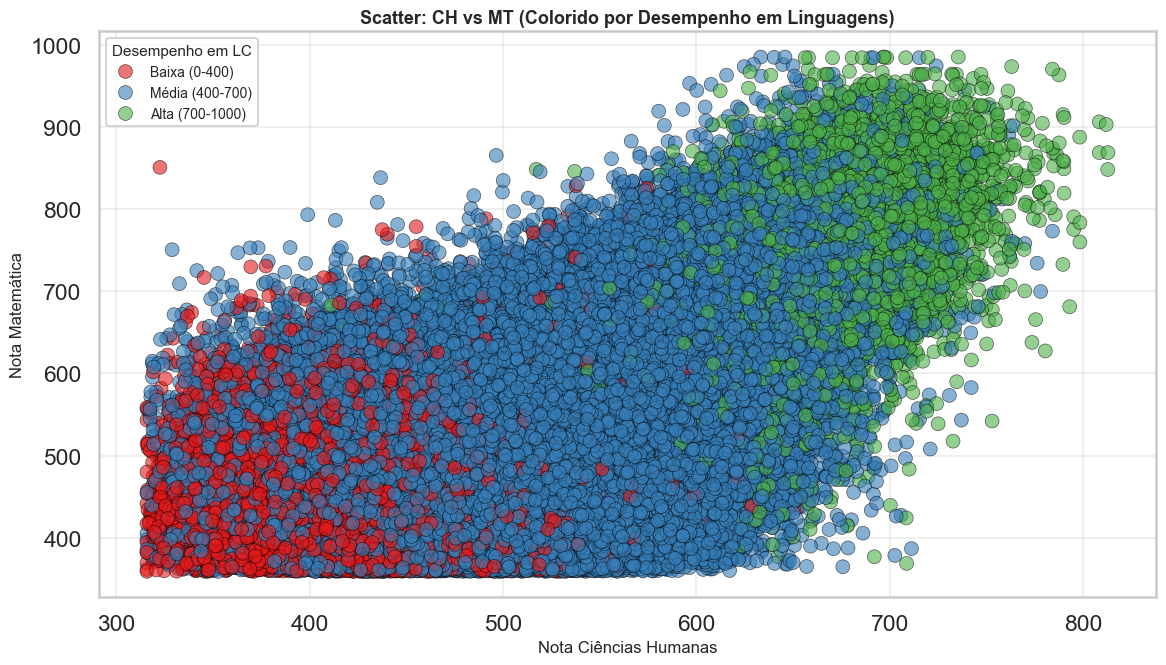

✅ Análise:
- Cada cor representa uma faixa de desempenho em Linguagens
- Padrão: visualizar se alunos com melhor LC têm melhor CH e MT


In [44]:
# SOLUÇÃO - Exercício 3: Scatter com Categorias
# Objetivo: Scatter de CH vs MT, colorindo por faixas de LC

# Consolidar dados
df_ex3 = pd.DataFrame({
    'CH': datasets['CH']['NU_NOTA_CH'],
    'MT': datasets['MT']['NU_NOTA_MT'],
    'LC': datasets['LC']['NU_NOTA_LC']
})

# Criar categorias de LC (faixas de desempenho)
df_ex3['Faixa_LC'] = pd.cut(df_ex3['LC'], 
                             bins=3, 
                             labels=['Baixa (0-400)', 'Média (400-700)', 'Alta (700-1000)'])

# Criar figura
fig, ax = plt.subplots(figsize=(12, 7))

# Usar scatterplot do seaborn com 'hue' para cores por categoria
sns.scatterplot(data=df_ex3, x='CH', y='MT', 
                hue='Faixa_LC',      # Colorir por categoria
                palette='Set1',      # Paleta de cores
                s=100,              # Tamanho dos pontos
                alpha=0.6,
                edgecolor='black',
                linewidth=0.5,
                ax=ax)

ax.set_xlabel('Nota Ciências Humanas', fontsize=12)
ax.set_ylabel('Nota Matemática', fontsize=12)
ax.set_title('Scatter: CH vs MT (Colorido por Desempenho em Linguagens)', 
             fontsize=13, fontweight='bold')
ax.legend(title='Desempenho em LC', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Análise:")
print(f"- Cada cor representa uma faixa de desempenho em Linguagens")
print(f"- Padrão: visualizar se alunos com melhor LC têm melhor CH e MT")

### Solução - Exercício 4: Dashboard Multivariado

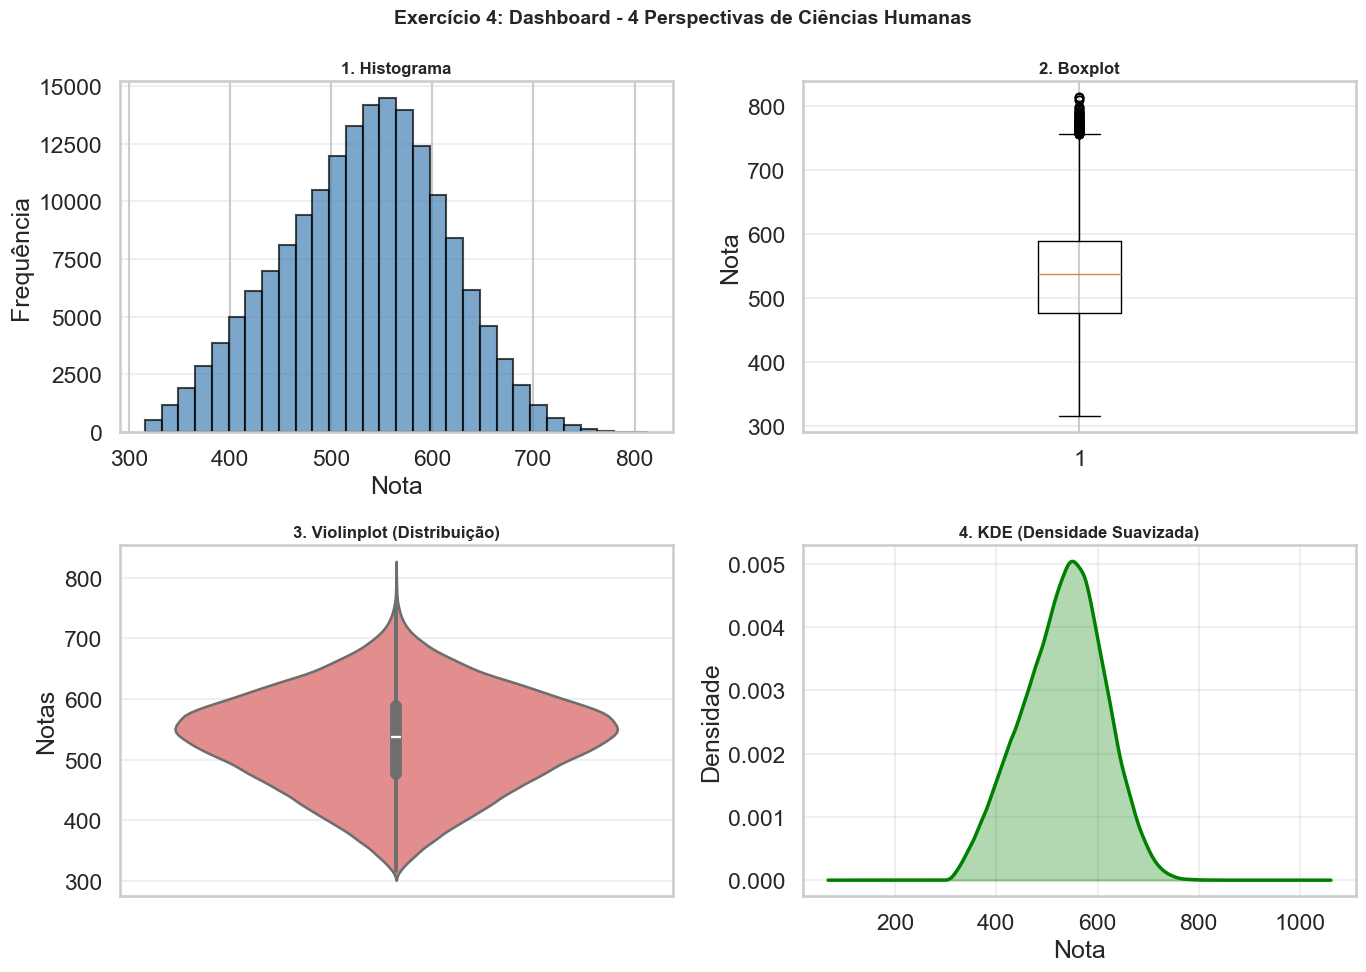

✅ Dashboard criado com sucesso!
- Histograma: Contagem discreta
- Boxplot: Tendência central
- Violinplot: Distribuição + densidade
- KDE: Distribuição contínua suavizada


In [45]:
# SOLUÇÃO - Exercício 4: Dashboard Multivariado
# Objetivo: 4 perspectivas diferentes dos mesmos dados

# Usar Humanas (CH) como foco
notas_ch = datasets['CH']['NU_NOTA_CH']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Subplot 1: Histograma ---
axes[0, 0].hist(notas_ch, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('1. Histograma', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Nota')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].grid(axis='y', alpha=0.3)

# --- Subplot 2: Boxplot ---
axes[0, 1].boxplot(notas_ch, vert=True)
axes[0, 1].set_title('2. Boxplot', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Nota')
axes[0, 1].grid(axis='y', alpha=0.3)

# --- Subplot 3: Violinplot (com seaborn) ---
df_temp = pd.DataFrame({'Notas': notas_ch})
sns.violinplot(y='Notas', data=df_temp, ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('3. Violinplot (Distribuição)', fontweight='bold', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# --- Subplot 4: KDE (Kernel Density Estimation) ---
notas_ch.plot(kind='kde', ax=axes[1, 1], linewidth=2.5, color='green')
axes[1, 1].fill_between(axes[1, 1].lines[0].get_xdata(), 
                        axes[1, 1].lines[0].get_ydata(), 
                        alpha=0.3, color='green')
axes[1, 1].set_title('4. KDE (Densidade Suavizada)', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Nota')
axes[1, 1].set_ylabel('Densidade')
axes[1, 1].grid(alpha=0.3)

fig.suptitle('Exercício 4: Dashboard - 4 Perspectivas de Ciências Humanas', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Dashboard criado com sucesso!")
print("- Histograma: Contagem discreta")
print("- Boxplot: Tendência central")
print("- Violinplot: Distribuição + densidade")
print("- KDE: Distribuição contínua suavizada")

### Solução - Exercício 5: Desafio - Qual disciplina tem maior variabilidade?

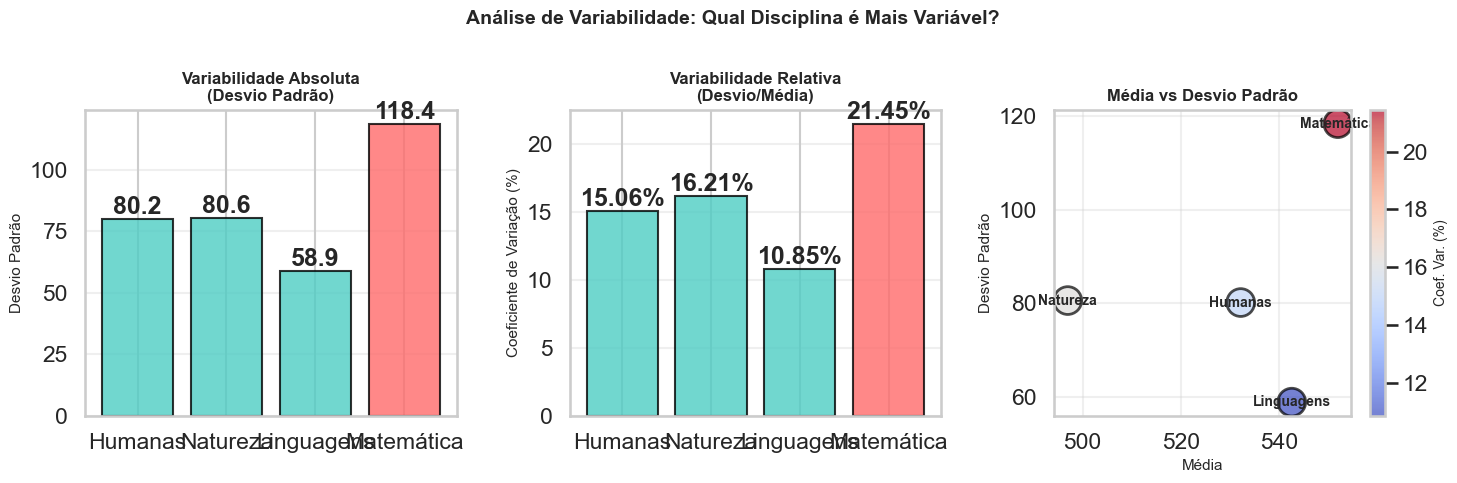


ANÁLISE ESTATÍSTICA POR DISCIPLINA

Humanas (CH):
  Média:                  532.26
  Desvio Padrão:           80.16
  Coeficiente Variação:    15.06%

Natureza (CN):
  Média:                  496.98
  Desvio Padrão:           80.59
  Coeficiente Variação:    16.21%

Linguagens (LC):
  Média:                  542.67
  Desvio Padrão:           58.86
  Coeficiente Variação:    10.85%

Matemática (MT):
  Média:                  552.07
  Desvio Padrão:          118.41
  Coeficiente Variação:    21.45%

✅ RESPOSTA: Matemática (MT) tem a maior variabilidade!
   Coeficiente de Variação: 21.45%


In [46]:
# SOLUÇÃO - Exercício 5: Desafio
# Pergunta: Qual disciplina tem maior variabilidade (desvio padrão)?

# Consolidar estatísticas
disciplinas = ['CH', 'CN', 'LC', 'MT']
nomes = ['Humanas', 'Natureza', 'Linguagens', 'Matemática']
desvios = []
medias = []
coef_var = []  # Coeficiente de variação (desvio/média)

for sigla, nome in zip(disciplinas, nomes):
    col = f'NU_NOTA_{sigla}'
    media = datasets[sigla][col].mean()
    desvio = datasets[sigla][col].std()
    cv = (desvio / media) * 100  # Coeficiente de variação em %
    
    medias.append(media)
    desvios.append(desvio)
    coef_var.append(cv)

# Criar visualização
fig = plt.figure(figsize=(15, 5))

# --- Gráfico 1: Barras comparando desvios padrão ---
ax1 = plt.subplot(1, 3, 1)
cores_var = ['#FF6B6B' if cv == max(coef_var) else '#4ECDC4' for cv in coef_var]
bars = ax1.bar(nomes, desvios, color=cores_var, edgecolor='black', linewidth=1.5, alpha=0.8)

# Adicionar valores nas barras
for bar, desvio in zip(bars, desvios):
    altura = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., altura,
            f'{desvio:.1f}', ha='center', va='bottom', fontweight='bold')

ax1.set_ylabel('Desvio Padrão', fontsize=11)
ax1.set_title('Variabilidade Absoluta\n(Desvio Padrão)', fontweight='bold', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# --- Gráfico 2: Coeficiente de Variação (relativo) ---
ax2 = plt.subplot(1, 3, 2)
bars2 = ax2.bar(nomes, coef_var, color=cores_var, edgecolor='black', linewidth=1.5, alpha=0.8)

for bar, cv in zip(bars2, coef_var):
    altura = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., altura,
            f'{cv:.2f}%', ha='center', va='bottom', fontweight='bold')

ax2.set_ylabel('Coeficiente de Variação (%)', fontsize=11)
ax2.set_title('Variabilidade Relativa\n(Desvio/Média)', fontweight='bold', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

# --- Gráfico 3: Scatter - Média vs Desvio ---
ax3 = plt.subplot(1, 3, 3)
scatter = ax3.scatter(medias, desvios, s=400, c=coef_var, cmap='coolwarm', 
                     edgecolors='black', linewidth=2, alpha=0.7)

# Adicionar rótulos aos pontos
for nome, media, desvio in zip(nomes, medias, desvios):
    ax3.annotate(nome, (media, desvio), 
                fontsize=10, fontweight='bold', ha='center', va='center')

ax3.set_xlabel('Média', fontsize=11)
ax3.set_ylabel('Desvio Padrão', fontsize=11)
ax3.set_title('Média vs Desvio Padrão', fontweight='bold', fontsize=12)
ax3.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Coef. Var. (%)', fontsize=10)

plt.suptitle('Análise de Variabilidade: Qual Disciplina é Mais Variável?', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar estatísticas numericamente
print("\n" + "="*70)
print("ANÁLISE ESTATÍSTICA POR DISCIPLINA")
print("="*70)

for nome, sigla, media, desvio, cv in zip(nomes, disciplinas, medias, desvios, coef_var):
    print(f"\n{nome} ({sigla}):")
    print(f"  Média:                {media:>8.2f}")
    print(f"  Desvio Padrão:        {desvio:>8.2f}")
    print(f"  Coeficiente Variação: {cv:>8.2f}%")

# Encontrar disciplina com maior variação
idx_max_var = coef_var.index(max(coef_var))
print(f"\n{'='*70}")
print(f"✅ RESPOSTA: {nomes[idx_max_var]} ({disciplinas[idx_max_var]}) tem a maior variabilidade!")
print(f"   Coeficiente de Variação: {max(coef_var):.2f}%")
print(f"{'='*70}")

---

## 📚 Resumo e Próximos Passos

### O que aprendemos:

✅ **Matplotlib**
- Criação de figuras com controle fino
- Múltiplos tipos de gráficos (scatter, histograma, linha, bar, box)
- Customização de cores, estilos, tamanhos
- Anotações, legendas, colorbars
- Subplots e múltiplos eixos

✅ **Seaborn**
- Visualizações estatísticas prontas
- Paletas de cores e contextos
- Boxplot, violinplot, regplot
- Heatmaps e pairplots
- Integração com pandas DataFrames

✅ **Conceitos de Visualização**
- Escolher o tipo certo de gráfico para os dados
- Comunicar insights com clareza
- Comparar distribuições e correlações
- Análise multivariada

### Dicas para praticar:

1. **Comece com dados reais** - Use seus próprios dados ou encontre datasets na internet
2. **Faça iterações** - Comece simples e vá adicionando complexidade
3. **Combine bibliotecas** - Use matplotlib para controle fino + seaborn para estética
4. **Estude exemplos** - Matplotlib e seaborn têm documentação com muitos exemplos
5. **Compartilhe** - Mostre seus gráficos para alguém e peça feedback

### Recursos adicionais:

- 📖 [Documentação Matplotlib](https://matplotlib.org)
- 📖 [Documentação Seaborn](https://seaborn.pydata.org)
- 📊 [Galeria Matplotlib](https://matplotlib.org/gallery)
- 📊 [Galeria Seaborn](https://seaborn.pydata.org/examples.html)

### Próximos tópicos a explorar:

- Plotly (gráficos interativos)
- Folium (mapas geográficos)
- Altair (visualização declarativa)
- Dashboards com Streamlit ou Dash

---

**Parabéns por completar esta aula! 🎉**

Você agora tem conhecimento sólido em visualização de dados com as ferramentas mais importantes do Python. Continue praticando e explorando!